# 05-03 - Entropy of Random Graph Ensembles

*May 22 2024*  

We calculate the entropy for different ensembles of random graphs.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.special import loggamma
from scipy.special import binom

import pathpyG as pp

plt.style.use('default')
sns.set_style("whitegrid")

### Entropy of $G(n,p)$ random graphs

Compared to the simple examples in the previous notebooks, the sample space of possible random graphs is huge and the probabilities of each individual realization is very small. For the terms $\binom{\binom{n+1}{2}}{m}$ amd $p^{\binom{n+1}{2}-m}$ in the entropy formula this would cause problems due to an over- and underflow. To avoid this, we can can compute those two numbers of logarithmic space:

In [2]:
def logbinom(n,k):
    return loggamma(n+1) - loggamma(n-k +1) - loggamma(k+1)

In [3]:
def H_G(n,p):
    # for these two special cases, H(G(n,p)) = 0 so we can return the result
    if (p ==0 or p == 1):
        return 0
    
    n_choose_2 = int(binom(n,2))
    entropy = 0
    for m in range(0, n_choose_2+1):
        entropy-= (
            np.exp(logbinom(n_choose_2,m) + 
                m * np.log(p) + 
                (n_choose_2 - m) * np.log(1-p))*
                (m * np.log(p) + (n_choose_2 - m) * np.log(1-p))
        )
    # above we calculate the entropy using natural logarithm (i.e. in nats rather than bits)
    # we can convert to bits by multiplying with the log2(e)
    return entropy * np.log2(np.e)

In [4]:
probs = np.linspace(0, 1, 50)

entropies = [ H_G(40, p) for p in probs ]

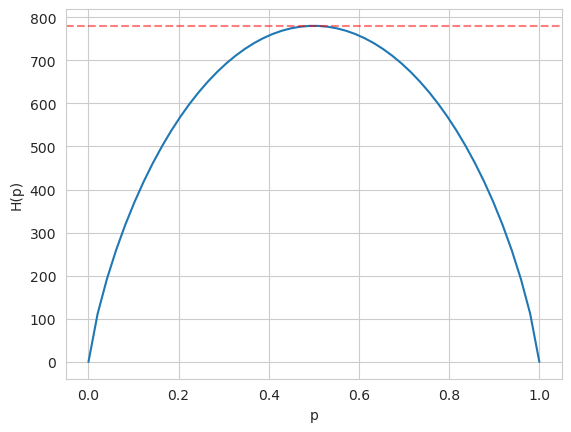

In [5]:
plt.plot(probs, entropies)
plt.xlabel('p')
plt.ylabel('H(p)')
plt.axhline(y=pp.algorithms.generative_models.max_edges(40, directed=False, self_loops=False), color='red', ls='--', alpha=0.5)

In [6]:
print('Entropy of G(40, 0.5) ensemble = {0:.2f}'.format(H_G(40, 0.5)))

Entropy of G(40, 0.5) ensemble = 780.00


In [7]:
print('Maximum number of edges in graph with 40 nodes = {0}'.format(pp.algorithms.generative_models.max_edges(40, directed=False, self_loops=False)))

Maximum number of edges in graph with 40 nodes = 780


### Entropy of $G(n,m)$ random graphs

In the lecture, we have seen that the entropy of the statistical ensemble generated by the $G(n,m)$ model for random graphs is particularly easy to compute. Since all microstates are equiprobable, the entropy corresponds to the logarithm of the number of possible realizations. For a network with $n$ nodes and $m$ links (including self-loops) we have 

$\binom{\binom{n+1}{2}}{m}$

different graphs, each having the same probablity.

In [8]:
def H_G(n, m):
    return np.log2(binom(binom(n+1,2), m))

In [9]:
ms = range(0, 820, 10)

entropies = [ H_G(40, m) for m in ms ]

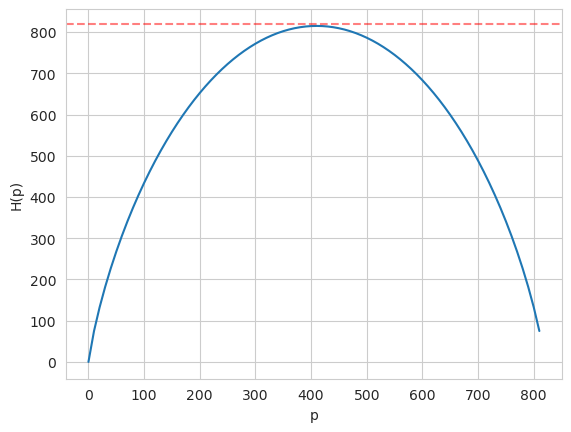

In [10]:
plt.plot(ms, entropies)
plt.xlabel('p')
plt.ylabel('H(p)')
plt.axhline(y=pp.algorithms.generative_models.max_edges(40, directed=False, self_loops=True), color='red', ls='--', alpha=0.5)